In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import f_oneway
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("palm_ffb.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           130 non-null    object 
 1   SoilMoisture   130 non-null    float64
 2   Average_Temp   130 non-null    float64
 3   Min_Temp       130 non-null    float64
 4   Max_Temp       130 non-null    float64
 5   Precipitation  130 non-null    float64
 6   Working_days   130 non-null    int64  
 7   HA_Harvested   130 non-null    float64
 8   FFB_Yield      130 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.3+ KB


,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [3]:
df.describe()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,527.646923,26.849918,21.379231,33.851538,188.980769,24.753846,793404.491565,1.602231
std,57.367844,0.651413,0.688971,1.079638,80.237210,1.239289,34440.893854,0.281751
min,380.700000,25.158065,18.900000,31.100000,2.000000,21.000000,683431.944400,1.080000
25%,488.625000,26.442285,21.000000,33.100000,140.300000,24.000000,768966.949100,1.390000
50%,538.300000,26.930645,21.500000,33.900000,182.150000,25.000000,790036.158050,1.585000
75%,571.025000,27.270726,21.800000,34.600000,226.100000,26.000000,821989.235250,1.807500
max,647.300000,28.580000,22.600000,36.000000,496.100000,27.000000,882254.225400,2.270000


In [4]:
df['Date'] = pd.to_datetime(df['Date'],format='%d.%m.%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           130 non-null    datetime64[ns]
 1   SoilMoisture   130 non-null    float64       
 2   Average_Temp   130 non-null    float64       
 3   Min_Temp       130 non-null    float64       
 4   Max_Temp       130 non-null    float64       
 5   Precipitation  130 non-null    float64       
 6   Working_days   130 non-null    int64         
 7   HA_Harvested   130 non-null    float64       
 8   FFB_Yield      130 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 9.3 KB


***
No null values in the dataset, and apart from date, all variables are continuous variables.
We proceed to test for normality for continuous variables, this will help me to determine whether to use parametric or non parametric tests for testing statistical significance between target and predictor variables. 
***

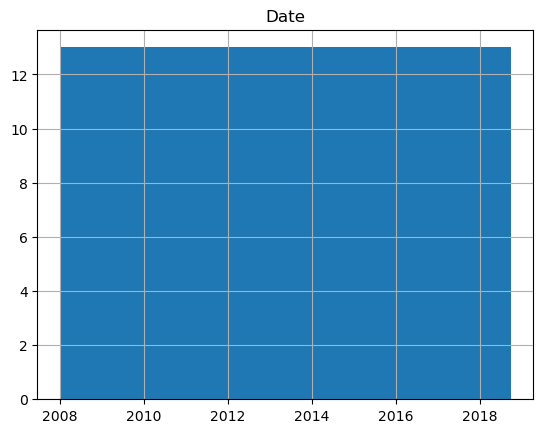

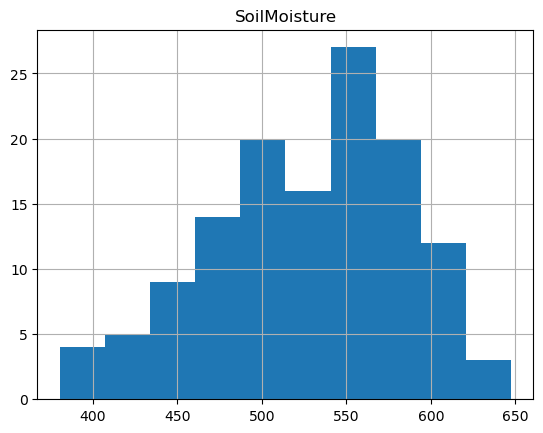

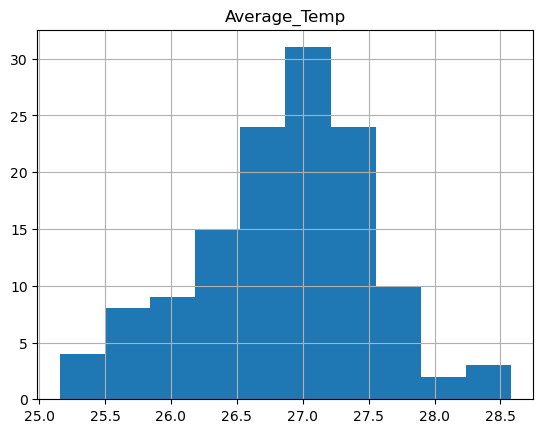

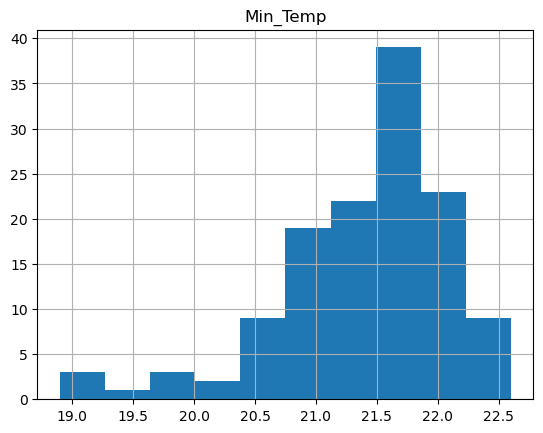

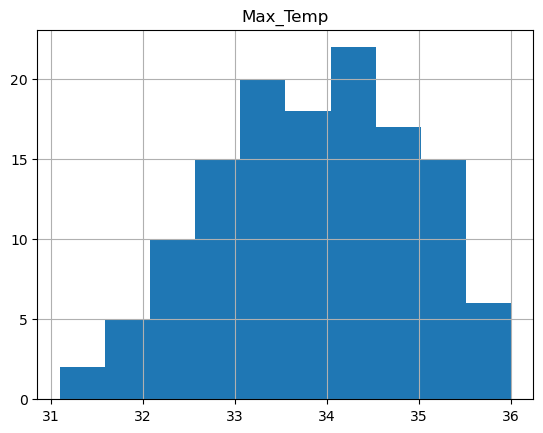

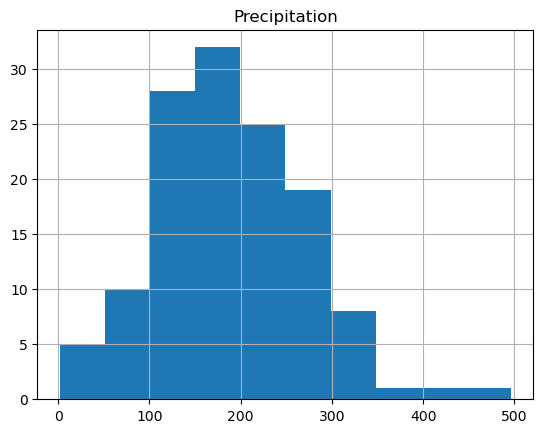

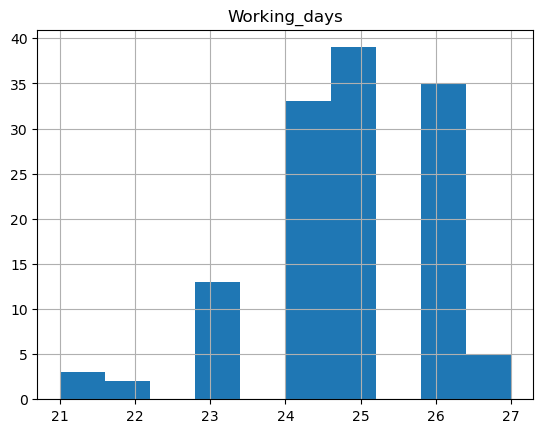

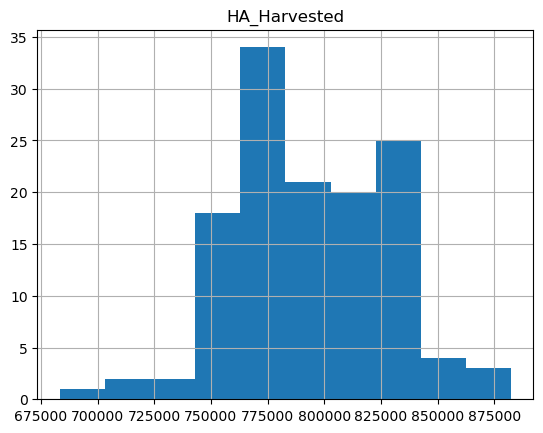

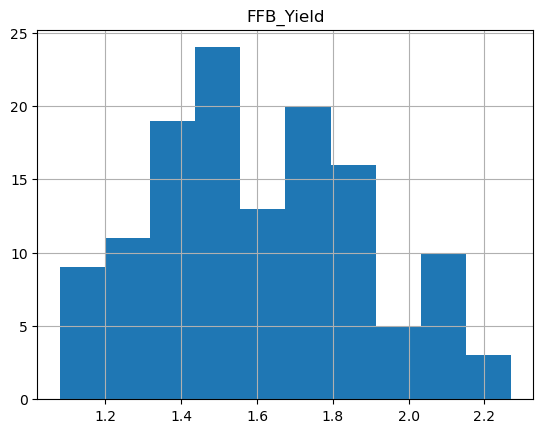

In [5]:
#check for normality
for col in df.columns: 
    df.hist(column=col)

In [6]:
#run normality test on continuous variables
for x in df.columns[1:]:
    print("variable ", x, ":", shapiro(df[x]))

variable  SoilMoisture : ShapiroResult(statistic=0.9820555448532104, pvalue=0.08353912830352783)
variable  Average_Temp : ShapiroResult(statistic=0.9841978549957275, pvalue=0.13662675023078918)
variable  Min_Temp : ShapiroResult(statistic=0.9324337840080261, pvalue=6.3626785049564205e-06)
variable  Max_Temp : ShapiroResult(statistic=0.9859548211097717, pvalue=0.20315690338611603)
variable  Precipitation : ShapiroResult(statistic=0.9784587621688843, pvalue=0.03651024028658867)
variable  Working_days : ShapiroResult(statistic=0.9121495485305786, pvalue=3.6078785115023493e-07)
variable  HA_Harvested : ShapiroResult(statistic=0.9857127070426941, pvalue=0.1924653947353363)
variable  FFB_Yield : ShapiroResult(statistic=0.9826728105545044, pvalue=0.09630613029003143)


***
Min_Temp, Precipitation and Working Days have non normal distributions(p<0.05), we will use non parametric tests when dealing with these variables.

Date also seems to follow a monthly trend, with each entry in the dataset looking like a record from the first of the month. If so, I think the month might a more useful indicator of FFB yield. The month could be an indicator of seasons as well alongside the other factors like precipitation and temperature. Previous research has suggested that rainfall has a significant effect on oil palm production in Malaysia (Abubakar et al. 2021), even higher than temperature, and Malaysia experiences heavier rainfall during the monsoon rainy seasons. 

Granted, that's assuming the dataset provided is Malaysian data. But if not, I still think it would be worthwhile to see if Month has a significant relationship with oil palm yield, and we can figure out the location and seasonality afterwards.
***

In [7]:
df['Month'] = df['Date'].dt.month
df = df.drop(['Date'], axis=1)
df.head()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield,Month
0,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62,1
1,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45,2
2,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56,3
3,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39,4
4,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44,5


***
I'll run pearson correlation tests for parametric features and spearman for non parametric features to test if any of the relationships between the predictor variables and FFB_Yield are significant. I could also run correlation tests between the predictor variables to test for any collinearity like I did in Task 1, as some of these variables _logically_ could be correlated i.e. Precipitation and SoilMoisture
***

In [8]:
coeff, p = stats.spearmanr(df['SoilMoisture'], df['Precipitation'])
print('Spearman correlation test for ', 'Soil Moisture and Precipitation : p-value: ', p, ' / correlation coefficient: ', coeff)

Spearman correlation test for  Soil Moisture and Precipitation : p-value:  5.568166750545414e-11  / correlation coefficient:  0.5348438645865272


***
The above test shows that Soil Moisture and Precipitation have a statistically significant relationship (p<0.05) and a moderate positive correlation (0.53), which makes logical sense since if there is more precipitation, there should also be more water in the soil. But since I'm not building a predictive model and am only interested in each feature's relationship with FFB_yield, I think these correlations are secondary and can be explored later on if needed after determining features with statistical significance to FFB_Yield. 

Back to the correlation tests
***

In [9]:

#use pearson for parametric features
for x in ['SoilMoisture', 'Average_Temp','Max_Temp','HA_Harvested']:
    coeff, p = stats.pearsonr(df[x], df['FFB_Yield'])
    print('Pearson correlation test for ', x, ': p-value: ', p, ' / correlation coefficient: ', coeff)
#use spearman for non parametric features
for x in ['Min_Temp', 'Precipitation','Working_days']:
    coeff, p = stats.spearmanr(df[x], df['FFB_Yield'])
    print('Spearman correlation test for ', x, ': p-value: ', p, ' / correlation coefficient: ', coeff)
#use one way anova for Month, as I am treating month as a categorical variable
grps = [b['FFB_Yield'] for a, b in df.groupby('Month')]
f, p = f_oneway(*grps)
print('Anova test for Month, p-value: ', p)

Pearson correlation test for  SoilMoisture : p-value:  0.9713300051590029  / correlation coefficient:  -0.0031829013542888918
Pearson correlation test for  Average_Temp : p-value:  0.95053043130921  / correlation coefficient:  -0.005494352923598553
Pearson correlation test for  Max_Temp : p-value:  0.42082145429981255  / correlation coefficient:  -0.07120090454850746
Pearson correlation test for  HA_Harvested : p-value:  4.413086896894055e-05  / correlation coefficient:  -0.3502218383833432
Spearman correlation test for  Min_Temp : p-value:  0.3403723878484257  / correlation coefficient:  0.08428645655760857
Spearman correlation test for  Precipitation : p-value:  0.00030274731671643923  / correlation coefficient:  0.3119436010637534
Spearman correlation test for  Working_days : p-value:  0.25952086665521323  / correlation coefficient:  0.09960628958280257
Anova test for Month, p-value:  6.196926803922302e-21


***
Interestingly not many of the predictor variables in our dataset have a statistically significant relationship with FFB_yield. The ones that do are:
<br>
<br>
**HA_Harvested has a significant relationship (p<0.05) and a weak negative correlation(-0.35)<br>
Precipitation has a significant relationship (p<0.05) and a weak positive correlation (0.31)<br>
Month has a significant relationship with FFB_yield (p<0.05)**
<br>
<br>
For HA_Harvested, it seems unintuitive that it would affect FFB_Yield negatively, since FFB_Yield is calculated based on Tonnes divided by the Hectares harvested. Perhaps harvesting a large amount of hectares at the start of each month may cause a slight decrease in the yield per hectare in following months?
<br>
<br>
Interestingly, Precipitation also has a positive correlation with FFB_Yield while SoilMoisture is not statistically significant. Month also has a statistically significant impact on FFB_Yield. I'm interested in seeing the distribution of FFB_Yield per month now
***

<AxesSubplot:xlabel='Month', ylabel='FFB_Yield'>

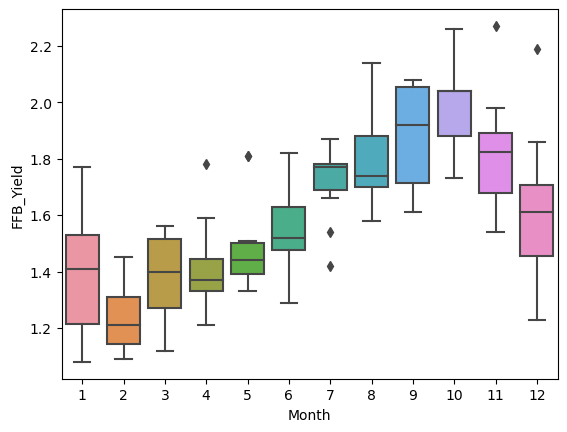

In [10]:
#Boxplot for FFB_Yield range by month
sns.boxplot(x='Month', y='FFB_Yield', data=df)

<AxesSubplot:xlabel='Month'>

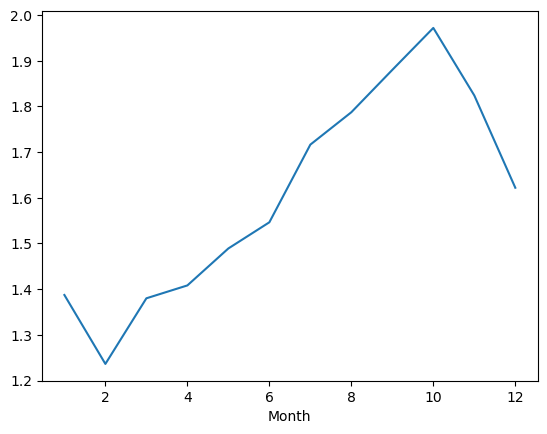

In [11]:
#Plot mean FFB_Yield by month
df.groupby(['Month'])['FFB_Yield'].mean().plot()

***
We can observe that there tends to be a rising trend in FFB_Yield in the second and third quarter of the year, spiking in October before dropping to its lowest point in February, which just so happens to coincide with Malaysia's Southwest Monsoon Period of April to October haha. The higher rainfall during Monsoon may be the cause for the increased yield, as we know precipitation also has a positive correlation with FFB_yield
<br><br>
This falls in line with previous research that suggests palm oil production is linked to rainfall (Abubakar et al. 2021), as the results of these tests show that precipitation and month have a positive correlation with FFB_Yield. 
<br><br>
**Based on these results, Precipitation, Month, and Hectares Harvested are the external factors that have a significant relationship with the yield of oil palm trees**
***